In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
ff_df=pd.read_csv("forestfires.csv")

In [3]:
ff_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
ff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# no null values in the data set

# Data Visualization

<AxesSubplot:xlabel='month', ylabel='count'>

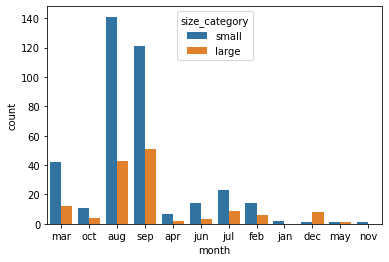

In [6]:
sns.countplot(x=ff_df['month'],hue=ff_df['size_category'])

In aug and sep we have small and large fires when compared to the rest of the month

<AxesSubplot:xlabel='day', ylabel='count'>

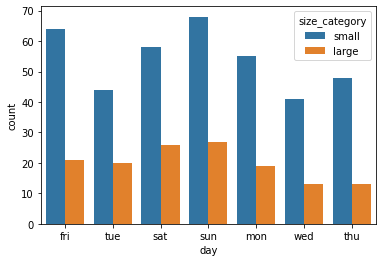

In [7]:
sns.countplot(x=ff_df['day'],hue=ff_df['size_category'])

On sunday there are little more forest fires than that on friday

<AxesSubplot:xlabel='size_category', ylabel='FFMC'>

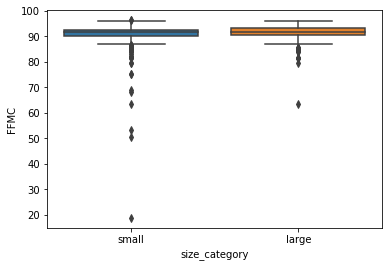

In [8]:
sns.boxplot(y=ff_df['FFMC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='DMC'>

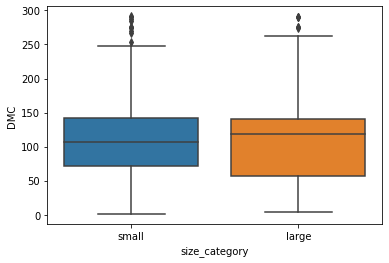

In [9]:
sns.boxplot(y=ff_df['DMC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='DC'>

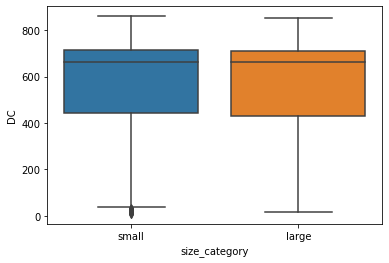

In [10]:
sns.boxplot(y=ff_df['DC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='ISI'>

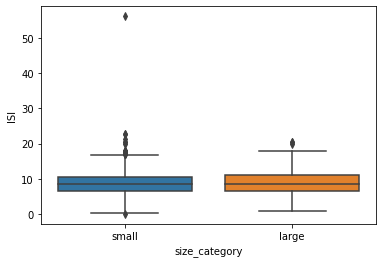

In [11]:
sns.boxplot(y=ff_df['ISI'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='temp'>

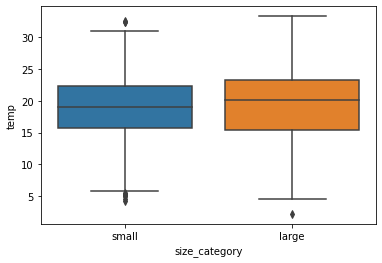

In [12]:
sns.boxplot(y=ff_df['temp'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='RH'>

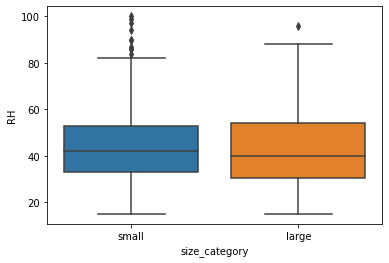

In [13]:
sns.boxplot(y=ff_df['RH'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='wind'>

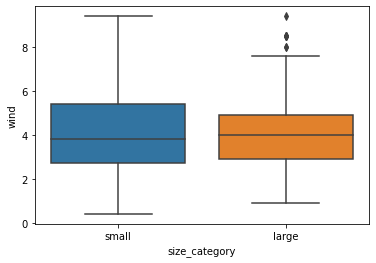

In [14]:
sns.boxplot(y=ff_df['wind'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='rain'>

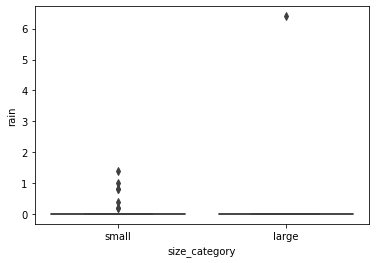

In [15]:
sns.boxplot(y=ff_df['rain'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='area'>

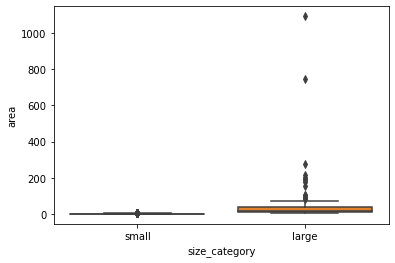

In [16]:
sns.boxplot(y=ff_df['area'],x=ff_df['size_category'])

the distribution of rest of the variables is almost same for small and large fires

# Data PreProcessing

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [18]:
ff_df['month']=label_encoder.fit_transform(ff_df['month'])
ff_df['day']=label_encoder.fit_transform(ff_df['day'])
ff_df['size_category']=label_encoder.fit_transform(ff_df['size_category'])

# Seperating features and target variable

In [19]:
x=ff_df.iloc[:,0:11]
y=ff_df.iloc[:,-1]


In [20]:
x.shape

(517, 11)

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

# NN

Using sigmoid as activation function for hidden layers and output layer as it is a Classification model with only two classes

In [22]:
# creating a model

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(11, input_dim=11 , activation='sigmoid'))
model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#model.add(tf.keras.layers.Dense(1,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history=model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
5/5 [==============================] - 0s 38ms/step - loss: 0.6462 - accuracy: 0.7385 - val_loss: 0.6511 - val_accuracy: 0.7019
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.6370 - accuracy: 0.7385 - val_loss: 0.6445 - val_accuracy: 0.7019
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.7385 - val_loss: 0.6388 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6214 - accuracy: 0.7385 - val_loss: 0.6332 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.7385 - val_loss: 0.6286 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6088 - accuracy: 0.7385 - val_loss: 0.6253 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.6045 - accuracy: 0.7385 - val_loss: 0.6225 - val_accuracy: 0.7019
Epoch 8/50
5/5 [=================

In [26]:
scores=model.evaluate(x,y)

17/17 [==============================] - 0s 937us/step - loss: 0.5801 - accuracy: 0.7311


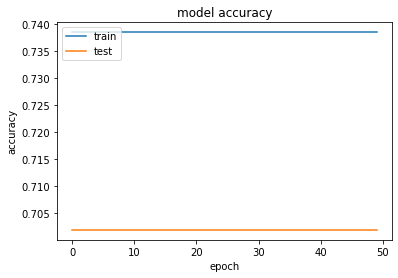

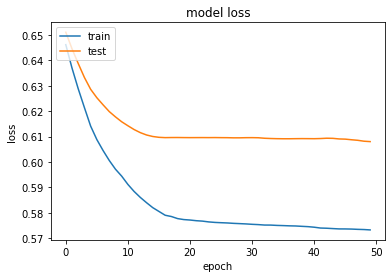

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()